<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   int64         
 1   Date             1000 non-null   datetime64[ns]
 2   ProductCategory  1000 non-null   object        
 3   SalesAmount      1000 non-null   float64       
 4   ProfitMargin     1000 non-null   float64       
 5   CustomerAge      1000 non-null   int64         
 6   CustomerGender   1000 non-null   object        
 7   Region           1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 62.6+ KB


/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_86113/1768364679.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby("AgeGroup")["SalesAmount"].sum().reset_index()


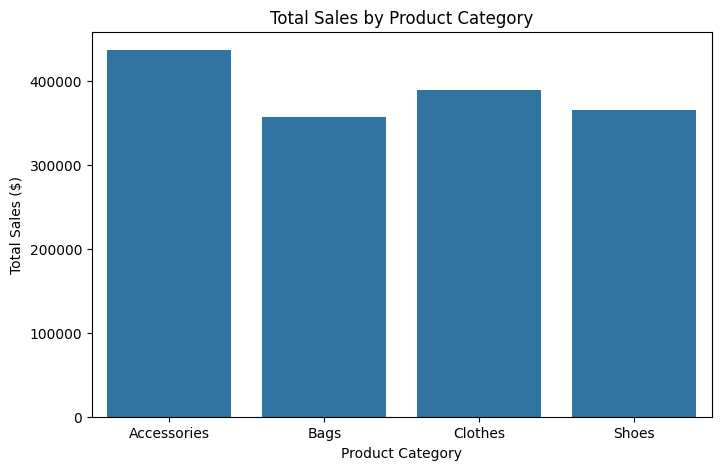

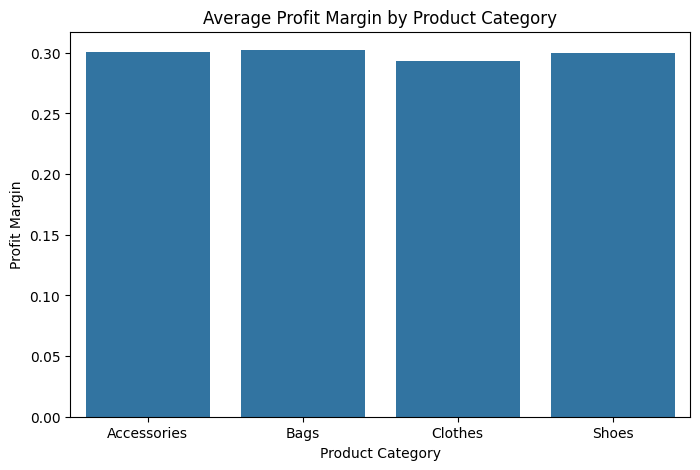

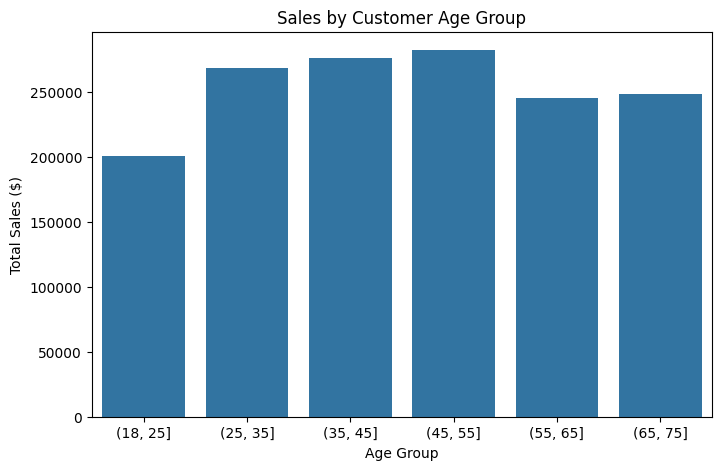

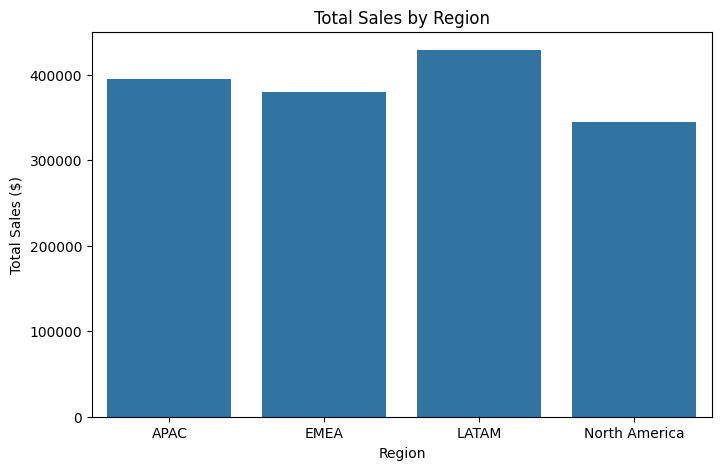

In [1]:
# %% [markdown]
# # Salvatore Ferragamo Retail Data Analysis
# This notebook demonstrates how to create a dataset for sales, profits, and customer demographics.

# %%
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %%
# 2. GENERATE SYNTHETIC DATA

np.random.seed(42)

n_customers = 1000  # number of transactions

data = {
    "TransactionID": np.arange(1, n_customers + 1),
    "Date": pd.date_range(start="2025-01-01", periods=n_customers, freq="D"),
    "ProductCategory": np.random.choice(
        ["Clothes", "Shoes", "Bags", "Accessories"], size=n_customers
    ),
    "SalesAmount": np.round(np.random.uniform(100, 3000, n_customers), 2),
    "ProfitMargin": np.round(np.random.uniform(0.10, 0.50, n_customers), 2),
    "CustomerAge": np.random.randint(18, 75, n_customers),
    "CustomerGender": np.random.choice(["Male", "Female", "Other"], n_customers),
    "Region": np.random.choice(
        ["North America", "EMEA", "APAC", "LATAM"], n_customers
    ),
}

df = pd.DataFrame(data)

# %%
# 3. VIEW DATA
df.head()

# %%
# 4. CLEANING CHECKS
df.info()
df.isnull().sum()

# %%
# 5. SUMMARY STATISTICS
df.describe()

# %%
# 6. TOTAL SALES BY CATEGORY
sales_by_category = df.groupby("ProductCategory")["SalesAmount"].sum().reset_index()
sales_by_category

# %%
# 7. AVERAGE PROFIT MARGIN BY CATEGORY
profit_by_category = (
    df.groupby("ProductCategory")["ProfitMargin"].mean().reset_index()
)
profit_by_category

# %%
# 8. SALES DISTRIBUTION BY REGION
sales_by_region = df.groupby("Region")["SalesAmount"].sum().reset_index()
sales_by_region

# %%
# 9. AGE DEMOGRAPHICS
age_bins = [18, 25, 35, 45, 55, 65, 75]
df["AgeGroup"] = pd.cut(df["CustomerAge"], bins=age_bins)
age_group_sales = df.groupby("AgeGroup")["SalesAmount"].sum().reset_index()
age_group_sales

# %%
# 10. VISUALIZATIONS

# Sales by product category
plt.figure(figsize=(8, 5))
sns.barplot(x="ProductCategory", y="SalesAmount", data=sales_by_category)
plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales ($)")
plt.xlabel("Product Category")
plt.show()

# %%
# Profit margin by category
plt.figure(figsize=(8, 5))
sns.barplot(x="ProductCategory", y="ProfitMargin", data=profit_by_category)
plt.title("Average Profit Margin by Product Category")
plt.ylabel("Profit Margin")
plt.xlabel("Product Category")
plt.show()

# %%
# Age group sales
plt.figure(figsize=(8, 5))
sns.barplot(x="AgeGroup", y="SalesAmount", data=age_group_sales)
plt.title("Sales by Customer Age Group")
plt.ylabel("Total Sales ($)")
plt.xlabel("Age Group")
plt.show()

# %%
# Sales by region
plt.figure(figsize=(8, 5))
sns.barplot(x="Region", y="SalesAmount", data=sales_by_region)
plt.title("Total Sales by Region")
plt.ylabel("Total Sales ($)")
plt.xlabel("Region")
plt.show()